In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = "browser"

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)

In [14]:
#!kaggle competitions download -c porto-seguro-safe-driver-prediction

In [15]:
#!unzip porto-seguro-safe-driver-prediction.zip

In [30]:
train_file = pd.read_csv('train.csv')
test_file = pd.read_csv('test.csv')
sample_submission_file = pd.read_csv('sample_submission.csv')
train_file.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [31]:
train = train_file.copy()
test = test_file.copy()
sample_submission = sample_submission_file.copy()
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
test.head()

In [ ]:
sample_submission.head()

In [ ]:
# ind = individual
# cat = categorical
# bin = binary (0 or 1)
# reg = regional
# car = about car
# calc = calculation fields

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              892816 non-null  int64  
 1   ps_ind_01       892816 non-null  int64  
 2   ps_ind_02_cat   892816 non-null  int64  
 3   ps_ind_03       892816 non-null  int64  
 4   ps_ind_04_cat   892816 non-null  int64  
 5   ps_ind_05_cat   892816 non-null  int64  
 6   ps_ind_06_bin   892816 non-null  int64  
 7   ps_ind_07_bin   892816 non-null  int64  
 8   ps_ind_08_bin   892816 non-null  int64  
 9   ps_ind_09_bin   892816 non-null  int64  
 10  ps_ind_10_bin   892816 non-null  int64  
 11  ps_ind_11_bin   892816 non-null  int64  
 12  ps_ind_12_bin   892816 non-null  int64  
 13  ps_ind_13_bin   892816 non-null  int64  
 14  ps_ind_14       892816 non-null  int64  
 15  ps_ind_15       892816 non-null  int64  
 16  ps_ind_16_bin   892816 non-null  int64  
 17  ps_ind_17_

In [20]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      892816 non-null  int64  
 1   target  892816 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 13.6 MB


In [21]:
train['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [ ]:
# 21694/595212 --> insanlarin %96 si sigorta yaptirmamis

In [32]:
train_float_cols = train.select_dtypes(include = np.float64)
train_int_cols = train.select_dtypes(include = np.int64)

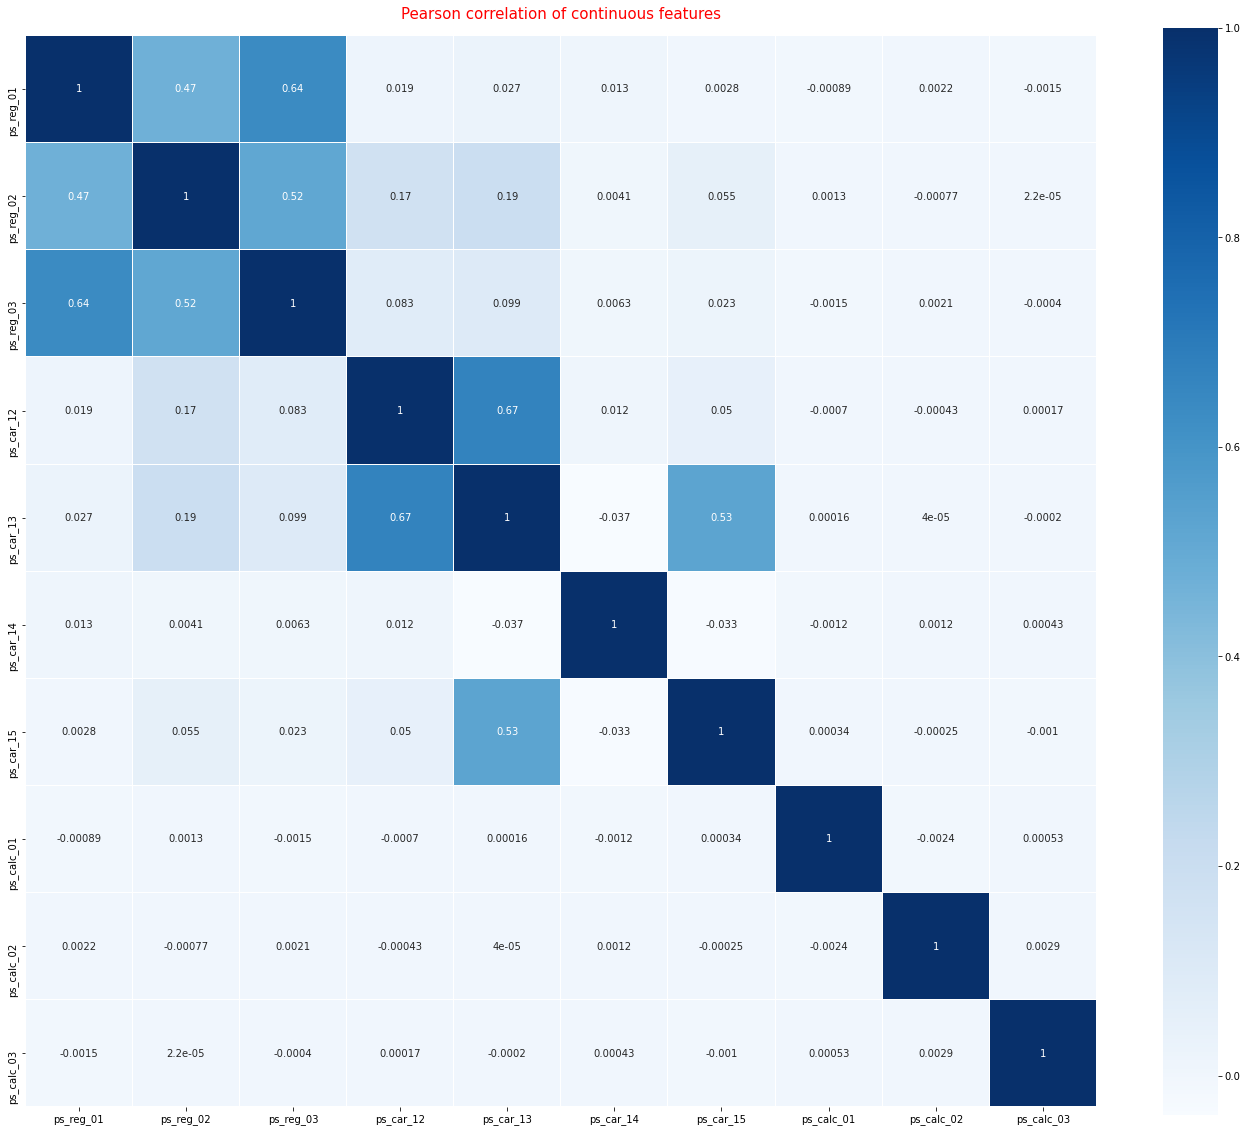

In [23]:
plt.figure(figsize=(24,20))
plt.title('Pearson correlation of continuous features', y=1.01, size=15, color= 'red')
sns.heatmap(train_float_cols.corr(),linewidths=0.1,vmax=1.0, square=True,
            cmap="Blues", linecolor='white', annot=True)
plt.show()

In [ ]:
# ps_re_02 ile ps_reg_03 arasinda 0.74,
# ps_car_12 ile ps_car_13 arasinda 0.67,
# ps_car_12 ile ps_car_14 arasinda 0.6,
# ps_car_13 ile ps_car_15 arasinda 0.53 korelasyon var!

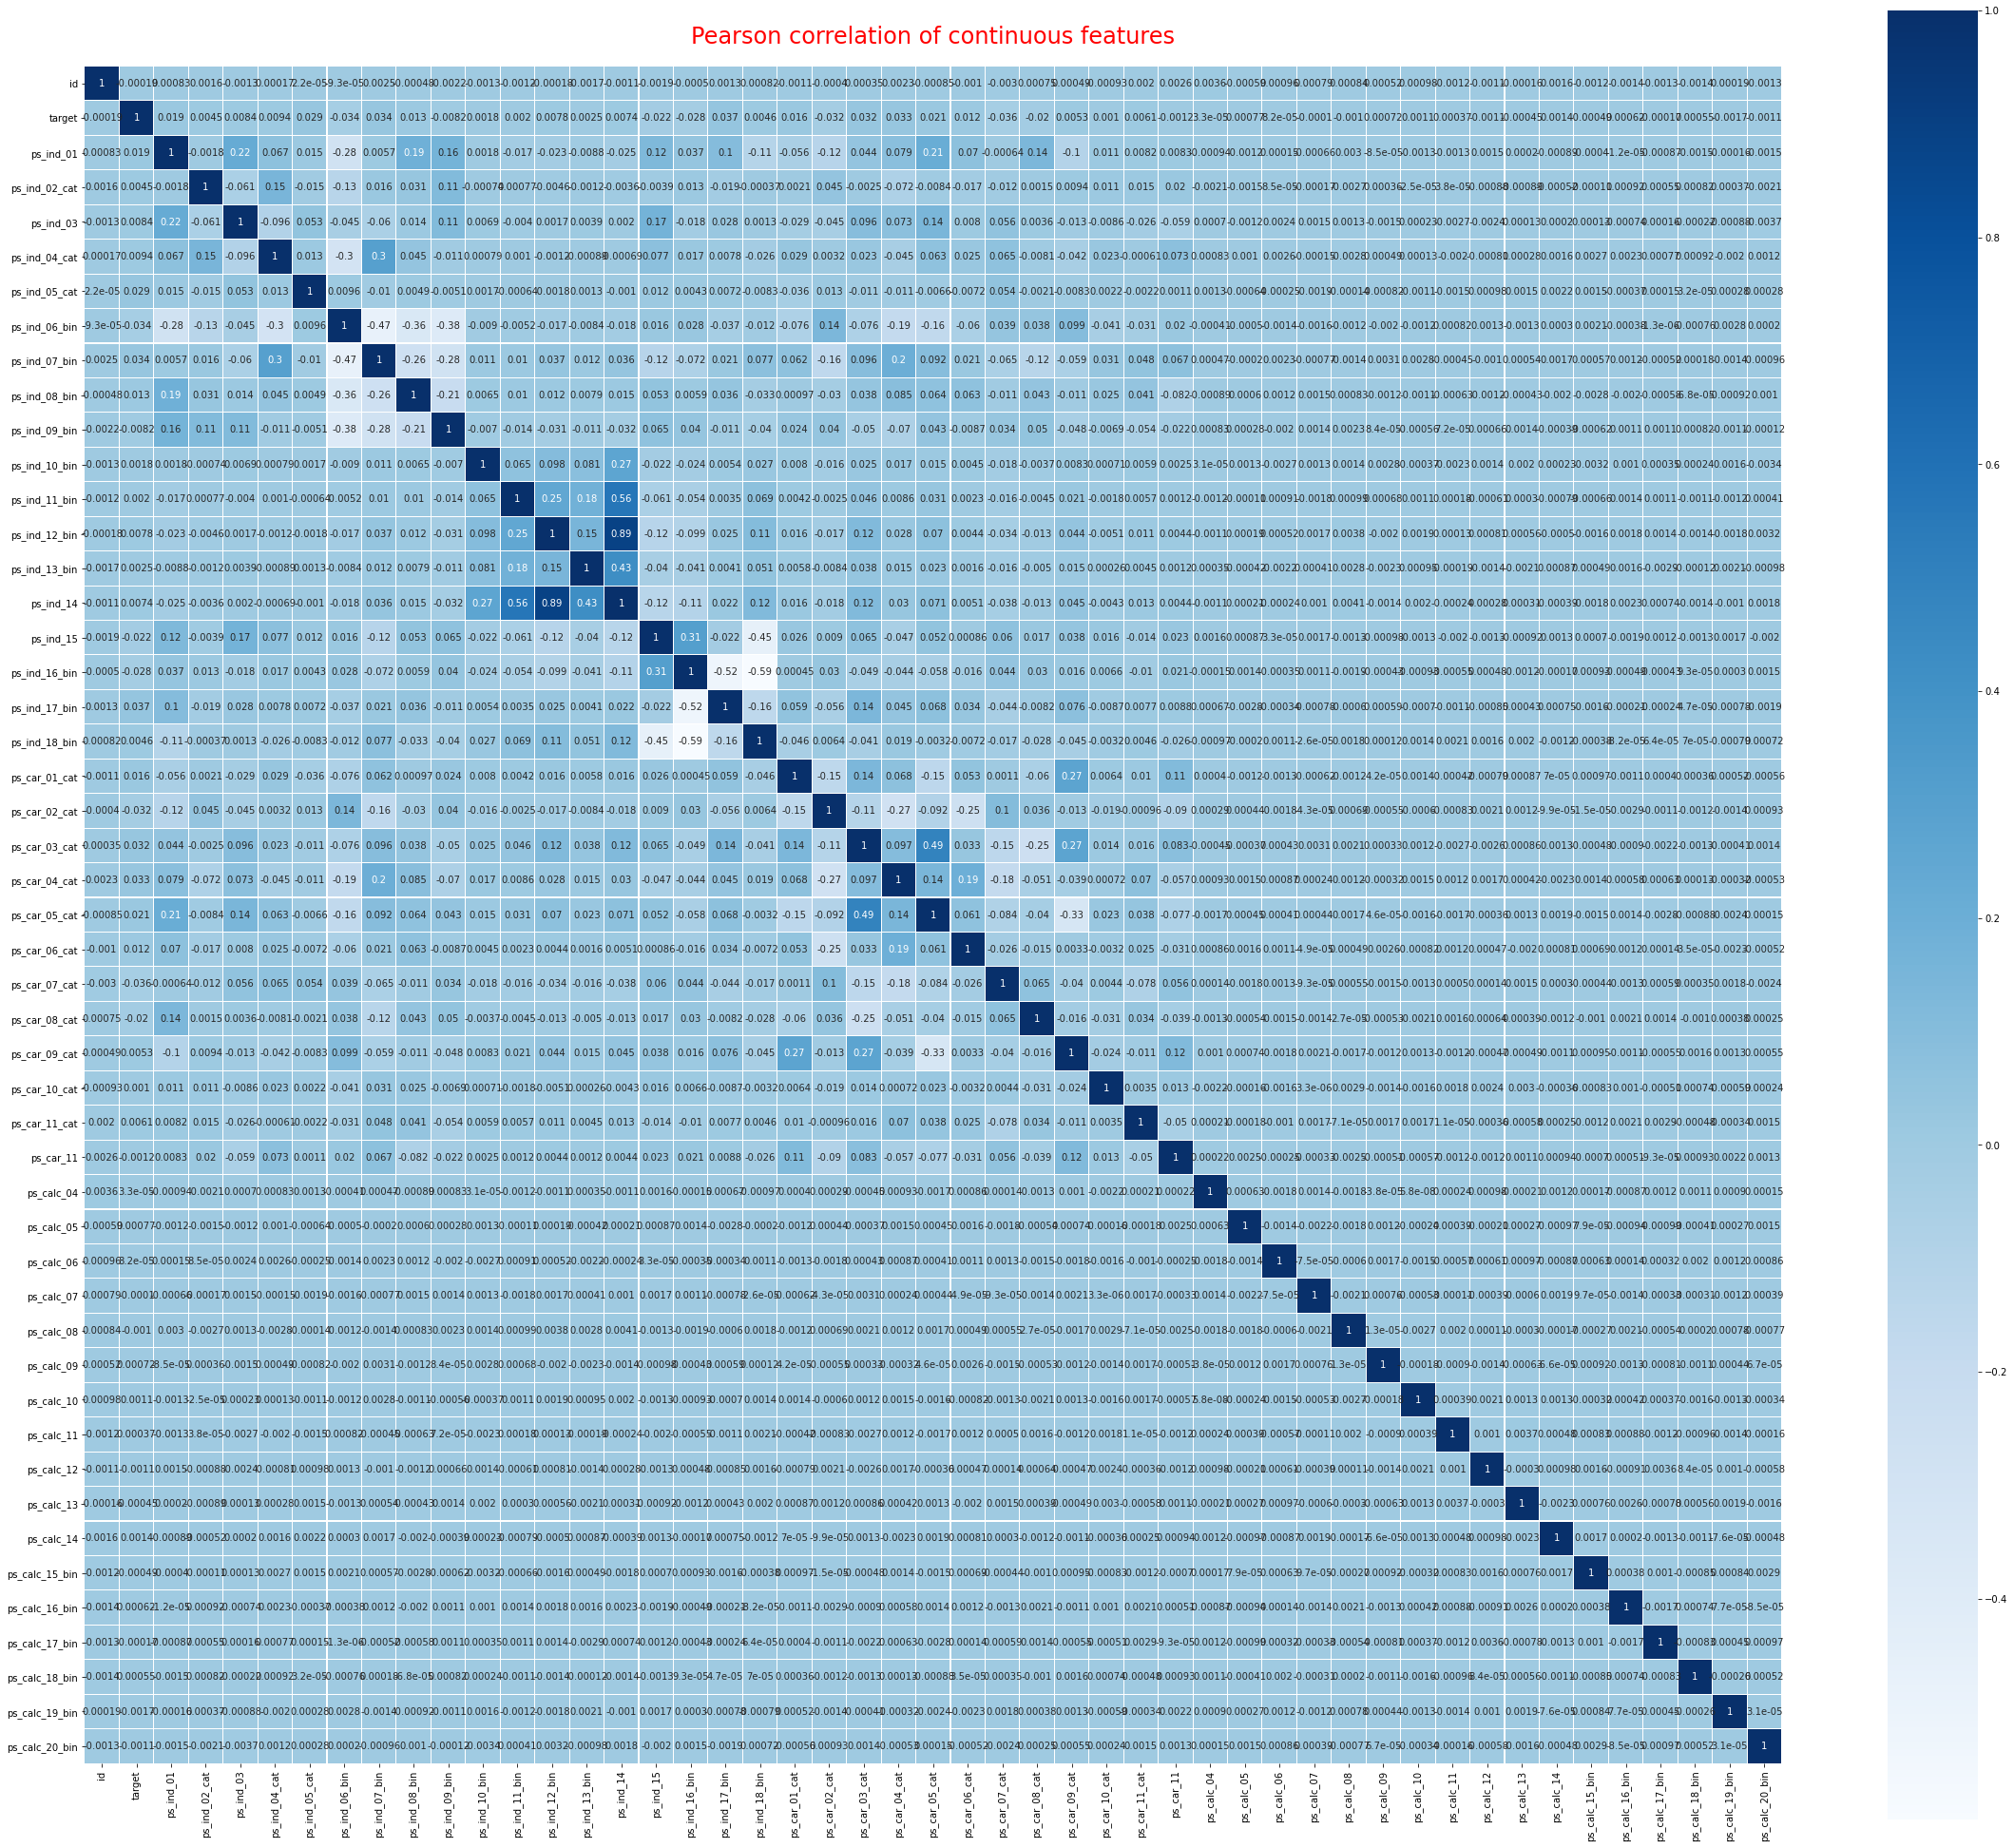

In [24]:
plt.figure(figsize=(40,35))
plt.title('Pearson correlation of continuous features', y=1.01, size=24, color = 'red')
sns.heatmap(train_int_cols.corr(),linewidths=0.1,vmax=1.0, square=True,
            cmap="Blues", linecolor='white', annot=True)
plt.show()

In [ ]:
# ps_ind_14 ile ps_ind_12_bin arasinda 0.89,
# ps_ind_18_bin ile ps_ind_16_bin arasinda --0.59,
# ps_ind_14 ile ps_ind_11_bin arasinda 0.56,
# # ps_ind_17_bin ile ps_ind_16_bin arasinda --0.52 korelasyon var.

In [33]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [12]:
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [ ]:
'''ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin degiskenlerinin neredeyse tamami 0. Bu degiskenleri silebiliriz. Aksi halde bu de[iskenler ileride kuracagimiz modelde overfitting meydana gelmesine sebep olabilir.'''

In [ ]:
'''Simdi random forest modeli kuralim ve sonrasinda feature-importance'larini inceleyelim.'''

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train.drop(['id', 'target'],axis=1), train.target)

RandomForestClassifier(max_depth=8, max_features=0.2, min_samples_leaf=4,
                       n_estimators=150, n_jobs=-1, random_state=0)

In [35]:
features = train.drop(['id', 'target'],axis=1).columns.values

In [16]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [36]:
def get_feature_importance_df(feature_importances,
                              column_names, 
                              top_n=25):
    """Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame"""
     
    imp_dict = dict(zip(column_names, feature_importances))
    
    # get name features sroted
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    
    # get values
    top_importances = [imp_dict[feature] for feature in top_features]
    
    # create dataframe with feature_importance
    df = pd.DataFrame(data={'feature': top_features, 'importance': top_importances})
    return df

[Text(0.5, 0, 'Variable name'),
 Text(0, 0.5, 'Importance'),
 Text(0.5, 1.0, 'Variable importances')]

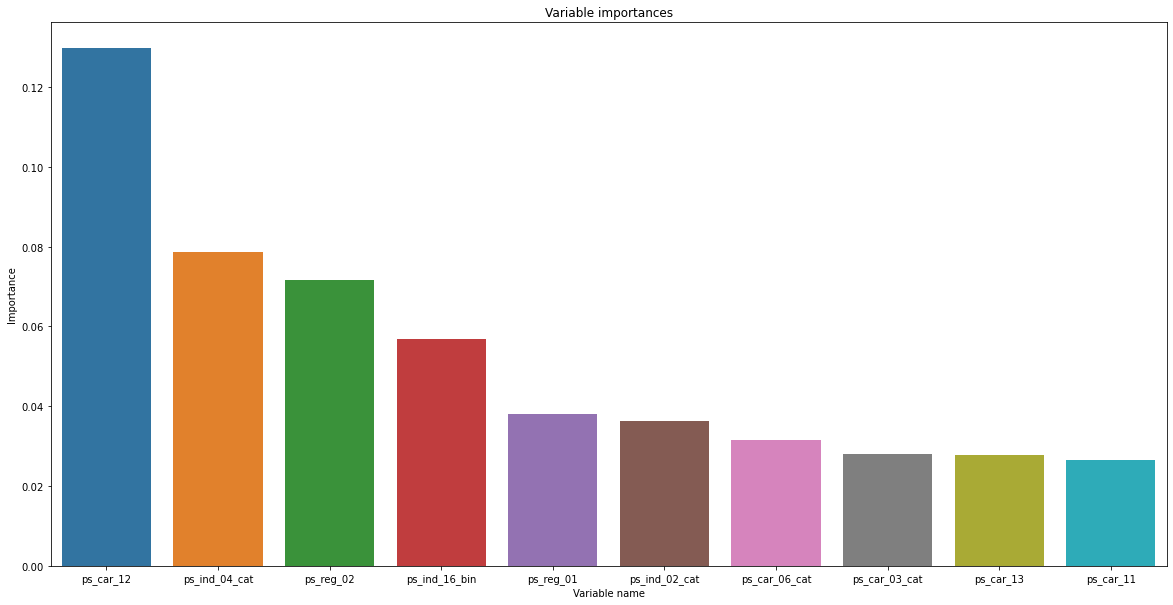

In [37]:
features = train.drop(['target'], axis=1).columns.values
feature_importance = get_feature_importance_df(rf.feature_importances_, features)

fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=feature_importance[:10], 
            x="feature", 
            y="importance", 
            ax=ax)
ax.set(xlabel='Variable name',
       ylabel='Importance',
       title="Variable importances")

In [38]:
rf_important_features = np.array(np.where(rf.feature_importances_>0.02)).tolist()[0]

In [ ]:
'''GBM ile degisken onemlerini inceleme'''

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.2, random_state=0)
gb.fit(train.drop(['id', 'target'],axis=1), train.target)

GradientBoostingClassifier(max_features=0.2, min_samples_leaf=4, random_state=0)

In [40]:
features = train.drop(['id', 'target'],axis=1).columns.values

In [19]:
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

[Text(0.5, 0, 'Variable name'),
 Text(0, 0.5, 'Importance'),
 Text(0.5, 1.0, 'Variable importances')]

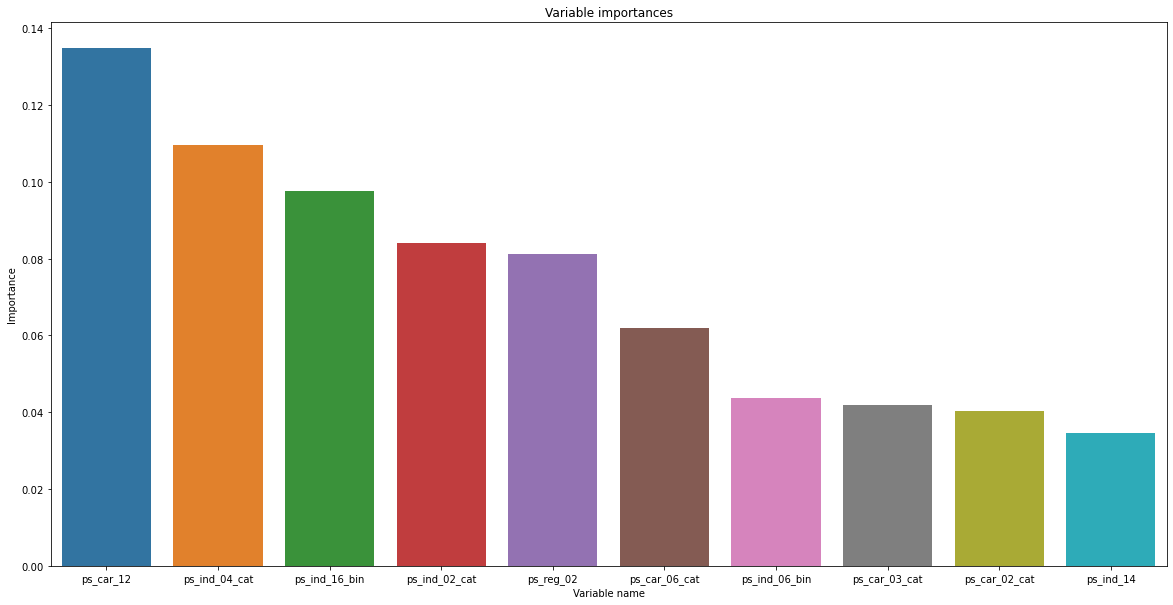

In [41]:
features = train.drop(['target'], axis=1).columns.values
feature_importance = get_feature_importance_df(gb.feature_importances_, features)

fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=feature_importance[:10], 
            x="feature", 
            y="importance", 
            ax=ax)
ax.set(xlabel='Variable name',
       ylabel='Importance',
       title="Variable importances")

In [42]:
gb_important_features = np.array(np.where(gb.feature_importances_>0.02)).tolist()[0]

In [45]:
'''rf ile gb icin onemli degiskenlerle liste olusturduk. Ben modele her ikisinde de onemli olan degiskenleri alacagim. Bu yuzden bu iki modelde de en onemli olan degiskenleri belirleyelim.'''

'rf ile gb icin en onemli degiskenleri listeye atadik. Ben modele her ikisinde de onemli olan degiskenleri alacagim. Bu yuzden bu iki modelde de en onemli olan degiskenleri belirleyelim.'

In [43]:
important_features_index = list(set.intersection(set(gb_important_features),set(rf_important_features)))
important_features_index

[2, 34, 4, 6, 14, 16, 19, 20, 21, 23, 24, 27]

In [61]:
# id ile target degiskenlerini cikardigimiz icin buradaki indexlere 2 eklememiz gerekir. Cunku biz onemli degiskenlerin test setindeki indexlerini ariyoruz.

In [44]:
important_features = [i+1 for i in important_features_index]
important_features

[3, 35, 5, 7, 15, 17, 20, 21, 22, 24, 25, 28]

In [ ]:
# Train seti icin ekstra target degiskeni oldugu icin indexleri birer arttirmamiz gerekir. Cunku bize ayni degiskenlerin train setindeki indexleri lazim.

In [45]:
important_features_train = [i+1 for i in important_features]
important_features_train

[4, 36, 6, 8, 16, 18, 21, 22, 23, 25, 26, 29]

In [ ]:
# Simdi train setinde target degiskeni de olmali. Onun indexini de ekleyelim.

In [46]:
important_features_train = important_features_train + [1]
important_features_train

[4, 36, 6, 8, 16, 18, 21, 22, 23, 25, 26, 29, 1]

In [ ]:
#Modele yukarida indexlerini belirledigimiz degiskenleri alacagim.

In [47]:
df_train = train.iloc[:,important_features_train]
df_test = test.iloc[:,important_features]

In [27]:
X = train.drop(['target','id'], axis=1).values
y = train['target'].values.astype(np.int8)
target_names = np.unique(y)
target_names

array([0, 1], dtype=int8)

In [ ]:
'''Aslinda veriseti incelendiginde kompleks oldugu soylenebilir. Kompleks verisetleri icin GBM, Random Forest,Deep Learning gibi modeller kullanilabilir. Fakat ben Random Forest modelinden iyi bir sonuc elde edemedim, bu yuzden Logistic Regression modeli kuracagim.'''

In [ ]:
'''Simdi t-SNE ile verisetinin kumelenme grafigini inceleyelim.'''

In [70]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', perplexity=30, method='barnes_hut', n_iter=1000, verbose=1)
X_tsne = tsne.fit_transform(X) 

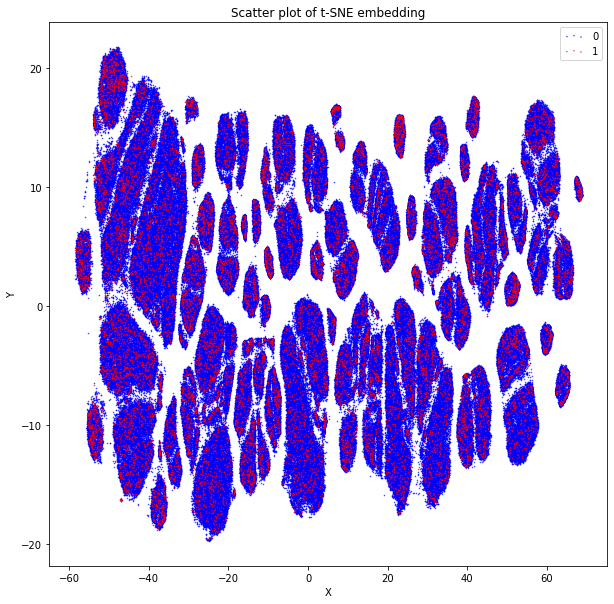

In [25]:
plt.figure(2, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
     plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, s=1,
             alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title('Scatter plot of t-SNE embedding')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('t-SNE-porto-01.png', dpi=150)
plt.show()

In [ ]:
# Daha once verisetindeki eksik degerlerin -1 ile dolduruldugunu gormustuk. Simdi -1 olan degerleri NaN yapalim ve ardindan tum eksik degerleri modlariyla dolduralim.


In [48]:
df_train.replace(-1, np.nan,inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ps_ind_03      595212 non-null  int64  
 1   ps_car_13      595212 non-null  float64
 2   ps_ind_05_cat  589403 non-null  float64
 3   ps_ind_07_bin  595212 non-null  int64  
 4   ps_ind_15      595212 non-null  int64  
 5   ps_ind_17_bin  595212 non-null  int64  
 6   ps_reg_02      595212 non-null  float64
 7   ps_reg_03      487440 non-null  float64
 8   ps_car_01_cat  595105 non-null  float64
 9   ps_car_03_cat  183981 non-null  float64
 10  ps_car_04_cat  595212 non-null  int64  
 11  ps_car_07_cat  583723 non-null  float64
 12  target         595212 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 59.0 MB


In [49]:
df_test.replace(-1, np.nan,inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ps_ind_03      892816 non-null  int64  
 1   ps_car_13      892816 non-null  float64
 2   ps_ind_05_cat  884106 non-null  float64
 3   ps_ind_07_bin  892816 non-null  int64  
 4   ps_ind_15      892816 non-null  int64  
 5   ps_ind_17_bin  892816 non-null  int64  
 6   ps_reg_02      892816 non-null  float64
 7   ps_reg_03      731132 non-null  float64
 8   ps_car_01_cat  892656 non-null  float64
 9   ps_car_03_cat  275905 non-null  float64
 10  ps_car_04_cat  892816 non-null  int64  
 11  ps_car_07_cat  875485 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 81.7 MB


In [50]:
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True) 

In [51]:
missing_value(df_train)
missing_value(df_test)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ps_ind_03      595212 non-null  int64  
 1   ps_car_13      595212 non-null  float64
 2   ps_ind_05_cat  595212 non-null  float64
 3   ps_ind_07_bin  595212 non-null  int64  
 4   ps_ind_15      595212 non-null  int64  
 5   ps_ind_17_bin  595212 non-null  int64  
 6   ps_reg_02      595212 non-null  float64
 7   ps_reg_03      595212 non-null  float64
 8   ps_car_01_cat  595212 non-null  float64
 9   ps_car_03_cat  595212 non-null  float64
 10  ps_car_04_cat  595212 non-null  int64  
 11  ps_car_07_cat  595212 non-null  float64
 12  target         595212 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 59.0 MB


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ps_ind_03      892816 non-null  int64  
 1   ps_car_13      892816 non-null  float64
 2   ps_ind_05_cat  892816 non-null  float64
 3   ps_ind_07_bin  892816 non-null  int64  
 4   ps_ind_15      892816 non-null  int64  
 5   ps_ind_17_bin  892816 non-null  int64  
 6   ps_reg_02      892816 non-null  float64
 7   ps_reg_03      892816 non-null  float64
 8   ps_car_01_cat  892816 non-null  float64
 9   ps_car_03_cat  892816 non-null  float64
 10  ps_car_04_cat  892816 non-null  int64  
 11  ps_car_07_cat  892816 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 81.7 MB


In [ ]:
# The unique value of "ps_car_11_cat" is maximum in the data set is 104

In [53]:
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')
category_type(df_train)
category_type(df_test)

In [54]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l

In [55]:
num_cols = df_train.select_dtypes(include = [np.number])
num_cols_ = df_test.select_dtypes(include = [np.number])

In [56]:
outlier(df_train,num_cols)
outlier(df_test,num_cols_)

ps_car_13 0.31788087655 1.2591761161500001 0.448300509774 1.6176168955090011
ps_reg_03 0.08484029175000007 1.54909582495 0.4183300132999999 1.8521946442
ps_car_13 0.3188870638624999 1.2584782365625 0.4485283558 1.6172399231399996
ps_reg_03 0.08156262285000004 1.55455860645 0.41907636539999993 1.8521946442


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   ps_ind_03      595212 non-null  category
 1   ps_car_13      595212 non-null  float64 
 2   ps_ind_05_cat  595212 non-null  category
 3   ps_ind_07_bin  595212 non-null  category
 4   ps_ind_15      595212 non-null  category
 5   ps_ind_17_bin  595212 non-null  category
 6   ps_reg_02      595212 non-null  category
 7   ps_reg_03      595212 non-null  float64 
 8   ps_car_01_cat  595212 non-null  category
 9   ps_car_03_cat  595212 non-null  category
 10  ps_car_04_cat  595212 non-null  category
 11  ps_car_07_cat  595212 non-null  category
 12  target         595212 non-null  category
dtypes: category(11), float64(2)
memory usage: 15.3 MB


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   ps_ind_03      892816 non-null  category
 1   ps_car_13      892816 non-null  float64 
 2   ps_ind_05_cat  892816 non-null  category
 3   ps_ind_07_bin  892816 non-null  category
 4   ps_ind_15      892816 non-null  category
 5   ps_ind_17_bin  892816 non-null  category
 6   ps_reg_02      892816 non-null  category
 7   ps_reg_03      892816 non-null  float64 
 8   ps_car_01_cat  892816 non-null  category
 9   ps_car_03_cat  892816 non-null  category
 10  ps_car_04_cat  892816 non-null  category
 11  ps_car_07_cat  892816 non-null  category
dtypes: category(10), float64(2)
memory usage: 22.1 MB


In [59]:
def OHE(df1,df2,column):
    cat_col = column
    len_df1 = df1.shape[0]
    
    df = pd.concat([df1,df2],ignore_index=True)
    c2,c3 = [],{}
    
    print('Categorical feature',len(column))
    for c in cat_col:
        if df[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True)

    df1 = df.loc[:len_df1-1]
    df2 = df.loc[len_df1:]
    print('Train',df1.shape)
    print('Test',df2.shape)
    return df1,df2

In [60]:
cat_cols = df_train.select_dtypes(include =['category']).columns
df_train,df_test = OHE(df_train,df_test,cat_cols)

Categorical feature 11
Train (595212, 75)
Test (892816, 75)


In [61]:
X = df_train.drop(['target'],axis=1)
y = df_train['target'].astype('category')
x_test = df_test.drop(['target'],axis=1)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [ ]:
logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=3)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

In [64]:
kf = StratifiedKFold(n_splits=5,random_state=45,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=0.003)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(x_test)[:,1]
    i+=1


1 of kfold 5
roc_auc_score 0.6260908444532973

2 of kfold 5
roc_auc_score 0.6302949237020897

3 of kfold 5
roc_auc_score 0.6301739814792843

4 of kfold 5
roc_auc_score 0.6290480586377334

5 of kfold 5
roc_auc_score 0.622673331938681


Text(0.5, 0, 'False positive rate')

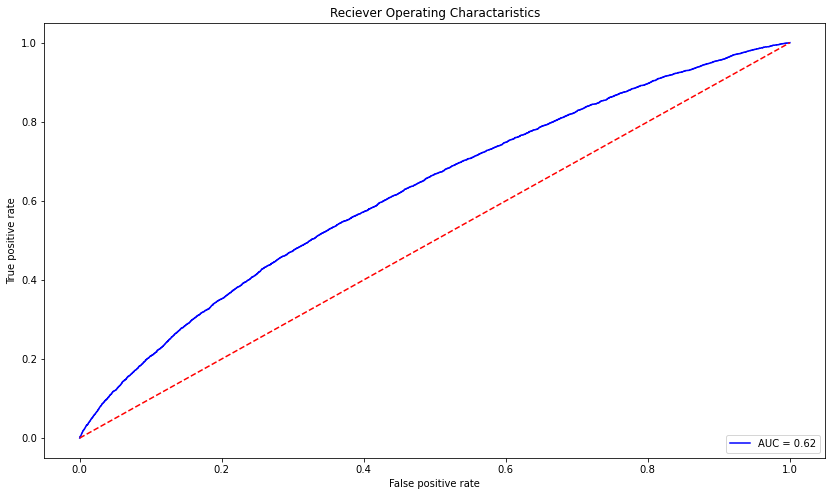

In [65]:
proba = lr.predict_proba(xvl)[:,1]
fpr,tpr, threshold = roc_curve(yvl,proba)
auc_val = auc(fpr,tpr)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Charactaristics')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [66]:
y_pred = pred_test_full/5
submit = pd.DataFrame({'id':test['id'],'target':y_pred})

In [67]:
submit.head()

,id,target
0,0,0.419872
1,1,0.456018
2,2,0.424763
3,3,0.384691
4,4,0.512824


In [68]:
submit.to_csv('kaggle_porto_sequro.csv',index=False)

In [ ]:
# skore = 0.25

In [ ]:
# RESOURCES
# https://zg104.github.io/Safe_Driver_Prediction/
# https://github.com/brunocampos01/porto-seguro-safe-driver-prediction/blob/master/notebooks/porto_seguro_safe_driver.ipynb
# https://www.kaggle.com/nirajvermafcb/principal-component-analysis-explained
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://www.veribilimiokulu.com/makine-ogrenmesine-cok-degiskenli-istatistiksel-yaklasimlar-temel-bilesenler-analizi/2/
# https://www.kaggle.com/sudhirnl7/simple-logistic-model-porto